#### References
- https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html
- https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
- https://towardsdatascience.com/computer-vision-for-beginners-part-4-64a8d9856208

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

209952


Text(0.5, 1.0, 'original image')

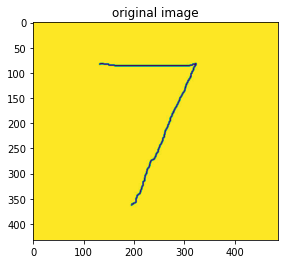

In [35]:
#reading and plotting the sample train image
img = cv2.imread('maths//seven.JPG',cv2.IMREAD_GRAYSCALE)
print(img.size)
plt.imshow(img)
plt.title('original image')


Text(0.5, 1.0, 'thresholded image')

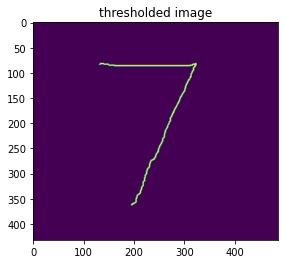

In [4]:
#inverting the original image using bitwise not operation
img=cv2.bitwise_not(img)
#by using the inverted we will perform thrsholding on the image using the desired pixels range so that noise is eliminated
ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.title('thresholded image')


In [5]:
#Contours are  curves joining all the continuous points (along the boundary), having same color or intensity
#The contours are a useful tool for shape analysis and object detection and recognition.
#we can draw the edges of an object using contours
#bounding rectange is a straight rectangle, it doesn't consider the rotation of the object. So area of the bounding rectangle
#won't be minimum. It is found by the function cv2.boundingRect().
#It is a straight rectangle, it doesn't consider the rotation of the object.
#So area of the bounding rectangle won't be minimum. 
#(x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.
#The mode cv2.RETR_TREE finds all the promising contour lines and reconstructs a full hierarchy of nested contours. 
ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ctrs[0]


array([[[133,  81]],

       [[131,  83]],

       [[131,  84]],

       [[133,  84]],

       [[134,  83]],

       [[139,  83]],

       [[140,  84]],

       [[148,  84]],

       [[150,  86]],

       [[160,  86]],

       [[161,  87]],

       [[311,  87]],

       [[312,  86]],

       [[316,  86]],

       [[318,  84]],

       [[319,  84]],

       [[320,  85]],

       [[320,  86]],

       [[319,  87]],

       [[319,  88]],

       [[317,  90]],

       [[317,  94]],

       [[315,  96]],

       [[315,  97]],

       [[314,  98]],

       [[314, 100]],

       [[312, 102]],

       [[312, 106]],

       [[311, 107]],

       [[311, 109]],

       [[310, 110]],

       [[310, 111]],

       [[307, 114]],

       [[307, 115]],

       [[306, 116]],

       [[306, 117]],

       [[305, 118]],

       [[305, 119]],

       [[304, 120]],

       [[304, 121]],

       [[303, 122]],

       [[303, 123]],

       [[302, 124]],

       [[302, 126]],

       [[301, 127]],

       [[3

In [6]:
#mostly we use this more than above one
ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
ctrs

[array([[[133,  81]],
 
        [[132,  82]],
 
        [[131,  83]],
 
        ...,
 
        [[136,  81]],
 
        [[135,  81]],
 
        [[134,  81]]], dtype=int32)]

In [7]:
cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
for c in cnt:
    print(c)
    break

[[[133  81]]

 [[132  82]]

 [[131  83]]

 ...

 [[136  81]]

 [[135  81]]

 [[134  81]]]


131 81 194 283
True


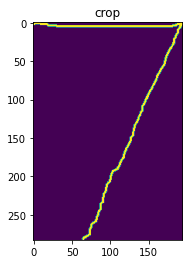

In [8]:

#initialize an empty list and values of w,h with 28 and maxi=0
train_data=[]
w=int(28)
h=int(28)
maxi=0
#here we will take the values of the rectangle box and crop the image then reshape the image to 28*28 
for c in cnt:
    #print(c)
    x,y,w,h=cv2.boundingRect(c)
    print(x,y,w,h)
    maxi=max(w*h,maxi)
    if maxi==w*h:
        print(True)
        x_max=x
        y_max=y
        w_max=w
        h_max=h
im_crop= thresh[y_max:y_max+h_max, x_max:x_max+w_max]
plt.imshow(im_crop)
plt.title('crop')
im_resize = cv2.resize(im_crop,(28,28))
im_resize=np.reshape(im_resize,(784,1))
train_data.append(im_resize)


#### process on test images

Text(0.5, 1.0, 'test image')

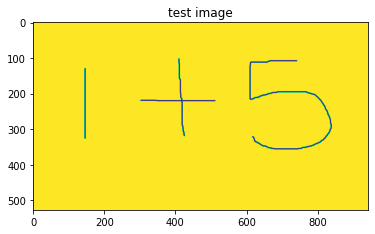

In [9]:
img = cv2.imread('maths//testing.JPG',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.title('test image')

Text(0.5, 1.0, 'thresholded image')

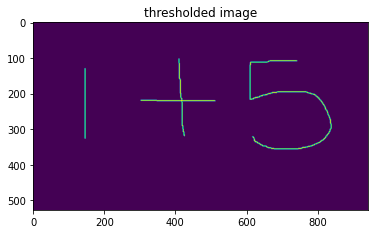

In [10]:
#inverting the original image using bitwise not operation
img=cv2.bitwise_not(img)
#by using the inverted we will perform thrsholding on the image using the desired pixels range so that noise is eliminated
ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.title('thresholded image')


In [13]:
#mostly we use this more than above one
#since there are 3 objects in the image we have len=3
ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
len(ctrs)


3

In [ ]:
cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [32]:
#initialize an empty list and values of w,h with 28 and maxi=0
train_data=[]
w=int(28)
h=int(28)
maxi=0
rects=[]
#here we will take the values of the rectangle box and crop the image then reshape the image to 28*28 
for c in cnt:
    #print(c)
    x,y,w,h=cv2.boundingRect(c)
    print(x,y,w,h)
    rect=[x,y,w,h]
    rects.append(rect)
#print('final rects',rects)
#the below code is to verify there are not contours that overlap
#sometimes there might be two or more contours for one image
bool_rect=[]
for r in rects:
    l=[]
    for rec in rects:
        flag=0
        if rec!=r:
            if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                flag=1
            l.append(flag)
        if rec==r:
            l.append(0)
    bool_rect.append(l)
 
dump_rect=[]
for i in range(0,len(cnt)):
    for j in range(0,len(cnt)):
        if bool_rect[i][j]==1:
            area1=rects[i][2]*rects[i][3]
            area2=rects[j][2]*rects[j][3]
            if(area1==min(area1,area2)):
                dump_rect.append(rects[i])
print(len(dump_rect)) 
print((dump_rect)) 


145 129 3 198
302 102 211 218
609 107 231 250
0
[]


In [29]:
#below are the final rectangles dimensions for the objects in the image
final_rect=[i for i in rects if i not in dump_rect]
final_rect

[[145, 129, 3, 198], [302, 102, 211, 218], [609, 107, 231, 250]]

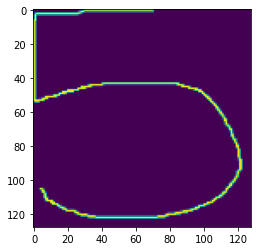

In [34]:
#plotting each object in the image
for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        cv2.imshow("work",im_resize)
        cv2.waitKey
        cv2.destroyAllWindows()